In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

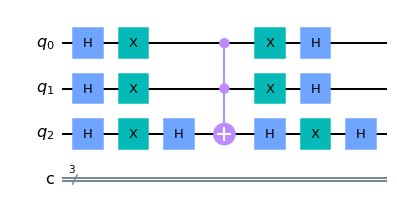

In [8]:
Grover = QuantumCircuit(3,3)

Grover.h(range(3))
Grover.x(range(3))

Grover.h(2)
Grover.mct([0,1],2,0)
Grover.h(2)

Grover.x(range(3))
Grover.h(range(3))

Grover.draw()

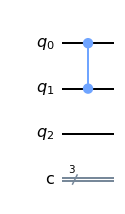

In [11]:
Detector = QuantumCircuit(3,3)

Detector.cz(1,0)
Detector.draw()

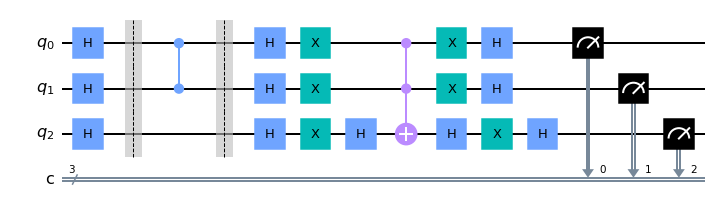

In [16]:
circ = QuantumCircuit(3,3)
circ.h(range(3))
circ.barrier(range(3))
circ = circ + Detector
circ.barrier(range(3))
circ = circ + Grover
circ.measure(range(3), range(3))
circ.draw()

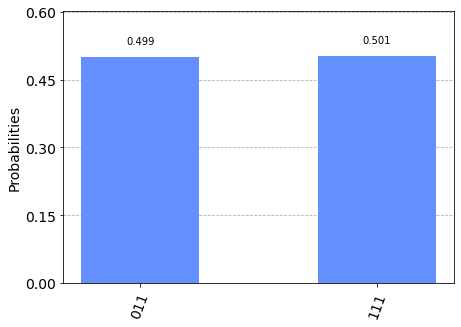

In [17]:
backend = Aer.get_backend("qasm_simulator")
job = execute(circ, backend, shots = 1000)
result = job.result()
count = result.get_counts(circ)
plot_histogram(count)